In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

%matplotlib inline

import os
os.getcwd()

# TrainIJCNN2013    '../data/TrainIJCNN2013/gt.txt'
#data = pd.read_csv('../data/TrainIJCNN2013/gt.txt', sep=";", header=None)

# FullIJCNN2013     '../data/FullIJCNN2013/gt.txt'
data = pd.read_csv('C:\\Users\\noaim\\Downloads\\FullIJCNN2013\\FullIJCNN2013\\gt.txt', sep=";", header=None)

In [3]:
data.columns = ["img", "x1", "y1", "x2", "y2", "id"]
data.head()

,img,x1,y1,x2,y2,id
0,00000.ppm,774,411,815,446,11
1,00001.ppm,983,388,1024,432,40
2,00001.ppm,386,494,442,552,38
3,00001.ppm,973,335,1031,390,13
4,00002.ppm,892,476,1006,592,39


In [68]:
print("Total number of images: ", len(data['img'].unique()))
print("Number of classes: ", len(data['id'].unique()))
print("Total number of instances of traffic signs in all images: ", data['id'].count())

Total number of images:  741
Number of classes:  43
Total number of instances of traffic signs in all images:  1213


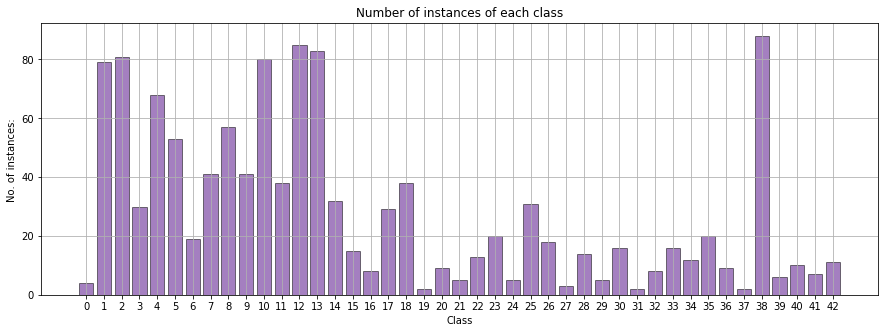

In [106]:
x = data["id"].value_counts().sort_index().index
y = data["id"].value_counts().sort_index()
plt.figure(figsize = (15,5))
plt.title("Number of instances of each class")
plt.bar(x, y, color = "indigo", alpha = 0.5, edgecolor = 'black')
plt.xticks(np.arange(43))
plt.xlabel("Class")
plt.ylabel("No. of instances: ")
plt.grid()
plt.show()

In [112]:
import hashlib

In [113]:
key = hashlib.sha256(encoded_jpg).hexdigest()


NameError: name 'encoded_jpg' is not defined

In [71]:
e = 0.2 * np.ones(43)

In [70]:
signnames = {0 : "speed limit 20 (prohibitory)", 1 : "speed limit 30 (prohibitory)", 2 : "speed limit 50 (prohibitory)", 3 : "speed limit 60 (prohibitory)",
 4 : "speed limit 70 (prohibitory)", 5 : "speed limit 80 (prohibitory)", 6 : "restriction ends 80 (other)", 7 : "speed limit 100 (prohibitory)",
 8 : "speed limit 120 (prohibitory)", 9 : "no overtaking (prohibitory)", 10 : "no overtaking (trucks) (prohibitory)",
 11 : "priority at next intersection (danger)", 12 : "priority road (other)", 13 : "give way (other)", 14 : "stop (other)",
 15 : "no traffic both ways (prohibitory)", 16 : "no trucks (prohibitory)", 17 : "no entry (other)", 18 : "danger (danger)",
 19 : "bend left (danger)", 20 : "bend right (danger)", 21 : "bend (danger)",22 : "uneven road (danger)",
 23 : "slippery road (danger)", 24 : "road narrows (danger)", 25 : "construction (danger)", 26 : "traffic signal (danger)",
 27 : "pedestrian crossing (danger)", 28 : "school crossing (danger)", 29 : "cycles crossing (danger)", 
 30 : "snow (danger)", 31 : "animals (danger)", 32 : "restriction ends (other)", 33 : "go right (mandatory)", 34 : "go left (mandatory)",
 35 : "go straight (mandatory)", 36 : "go right or straight (mandatory)", 37 : "go left or straight (mandatory)", 38 : "keep right (mandatory)",
 39 : "keep left (mandatory)", 40 : "roundabout (mandatory)", 41 : "restriction ends (overtaking) (other)", 42 : "restriction ends (overtaking (trucks)) (other)"
}

In [72]:
f = list(class_instances["class"])
labels = [signnames[i] for i in f]


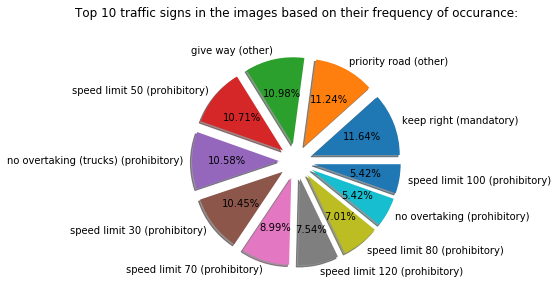

In [73]:
class_instances = pd.DataFrame(columns = ["class", "instances"])
class_instances["class"] = pd.value_counts(data['id'], sort=True).keys()
class_instances["instances"] = pd.value_counts(data['id'], sort=True).values
plt.pie(class_instances["instances"][0:11],labels = labels[0:11] , explode = e[0:11], shadow = True, autopct = "%.2f%%")
plt.title("Top 10 traffic signs in the images based on their frequency of occurance:\n\n")
plt.show()


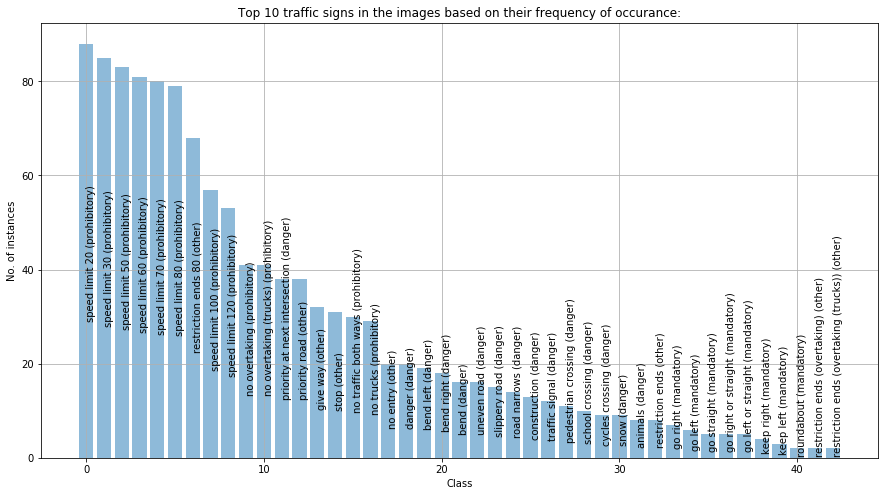

In [97]:
## most represented traffic signs
plt.figure(figsize = (15, 8))
plt.bar(np.arange(0, 43),height = class_instances["instances"], alpha = 0.5)
plt.title("Top 10 traffic signs in the images based on their frequency of occurance:")
for i in range(0, 43):
    plt.text(i, class_instances["instances"][i]/3, signnames[i], rotation = 90)
plt.ylabel("No. of instances")
plt.xlabel("Class")
plt.grid()
plt.show()


In [132]:
y_less = data.groupby("id").filter(lambda x: len(x) <= 1)
y_less

,img,x1,y1,x2,y2,id


In [133]:
data = pd.concat([data, y_less], ignore_index=True)


In [134]:
from sklearn.model_selection import train_test_split

In [138]:
x_train, x_test, y_train, y_test = train_test_split(data, data['id'])

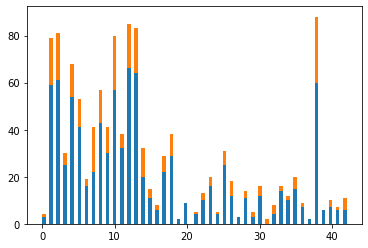

In [139]:
plt.hist([
        y_train.values, 
        #xt['id'],
        y_test.values, 
        ], 
        stacked=True, 
        label=["train", "test", "val"],
        bins=86
    )
plt.show()

In [147]:
len(data)

1213